In [4]:
import pandas as pd
import numpy as np
from IPython.display import display
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 200)
from matplotlib import pyplot as plt
from glob import glob
import utils

# train

In [18]:
use_files = ['train_f0']

files = utils.get_use_files(use_files, True)

X_train = pd.concat([
                pd.read_feather(f) for f in (files)
               ], axis=1)
y_train = utils.read_pickles('../data/label').TARGET


100%|██████████| 20/20 [00:00<00:00, 1601.77it/s]


In [19]:
files = sorted(glob('../feature_nejumi/*train*'))
files

['../feature_nejumi/CNT_PAYMENT_current_train.npy',
 '../feature_nejumi/nejumi_feature_current_ver2_rep_train.npy']

In [20]:
X_train['CNT_PAYMENT'] = np.load(files[0])
X_train['nejumi_v2'] = np.load(files[1])

In [22]:
X_train.shape

(307511, 222)

# test

In [24]:
use_files = ['test_f0']

files = utils.get_use_files(use_files, False)

X_test = pd.concat([
                pd.read_feather(f) for f in (files)
               ], axis=1)


In [27]:
files = sorted(glob('../feature_nejumi/*test*'))
files

['../feature_nejumi/CNT_PAYMENT_current_test.npy',
 '../feature_nejumi/nejumi_feature_current_ver2_rep_test.npy']

In [28]:
X_test['CNT_PAYMENT'] = np.load(files[0])
X_test['nejumi_v2'] = np.load(files[1])

# plt

In [29]:
def feature_vs_y(feature, y, feature_name=None, kind='kde', bw_method=None, bins=100):
    
    if feature_name is None:
        feature_name = feature.name
    
    df = y.to_frame('y')
    df[feature_name] = feature
    y0 = df[df.y==0]
    y1 = df[df.y==1]
    y0[feature_name].name = 'Actual:0'
    y1[feature_name].name = 'Actual:1'
    if kind=='kde':
        y0[feature_name].plot(kind='kde', legend=True, bw_method=bw_method)
        y1[feature_name].plot(kind='kde', legend=True, bw_method=bw_method)
    elif kind=='hist':
        y0[feature_name].plot(kind='hist',legend=True, bins=bins)
        y1[feature_name].plot(kind='hist',legend=True, bins=bins)
        
    plt.xlabel(f'{feature_name}')
    plt.title(f'{feature_name} Distribution', fontsize=13, alpha=0.5)
    plt.show()

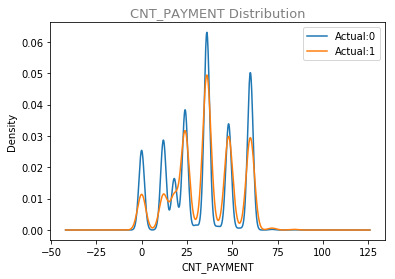

In [30]:
feature_vs_y( X_train['CNT_PAYMENT'], y )

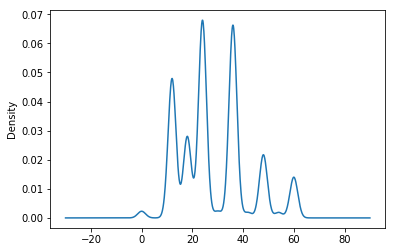

In [40]:
X_test['CNT_PAYMENT'].plot(kind='kde'); plt.show()

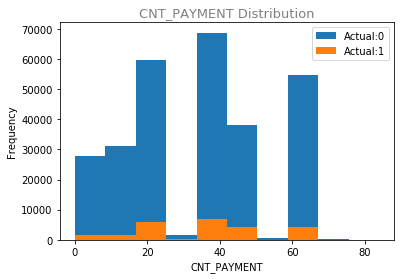

In [43]:
feature_vs_y( X_train['CNT_PAYMENT'], y , kind='hist', bins=10)

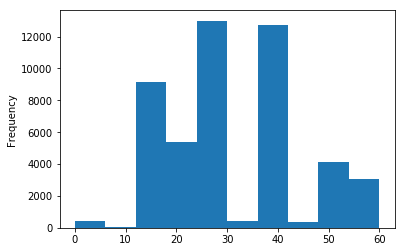

In [44]:
X_test['CNT_PAYMENT'].plot(kind='hist', bins=10); plt.show()

In [34]:
X_train.corr()

,f001_AMT_ANNUITY-d-CNT_FAM_MEMBERS,f001_AMT_ANNUITY,f001_AMT_CREDIT-d-CNT_FAM_MEMBERS,f001_AMT_CREDIT,f001_AMT_GOODS_PRICE-d-CNT_FAM_MEMBERS,f001_AMT_GOODS_PRICE,f001_AMT_INCOME_TOTAL-d-CNT_FAM_MEMBERS,f001_AMT_INCOME_TOTAL,f001_AMT_REQ_CREDIT_BUREAU_DAY,f001_AMT_REQ_CREDIT_BUREAU_HOUR,f001_AMT_REQ_CREDIT_BUREAU_MON,f001_AMT_REQ_CREDIT_BUREAU_QRT,f001_AMT_REQ_CREDIT_BUREAU_WEEK,f001_AMT_REQ_CREDIT_BUREAU_YEAR,f001_APARTMENTS_AVG,f001_APARTMENTS_MEDI,f001_APARTMENTS_MODE,f001_BASEMENTAREA_AVG,f001_BASEMENTAREA_MEDI,f001_BASEMENTAREA_MODE,f001_CNT_CHILDREN-d-CNT_FAM_MEMBERS,f001_CNT_FAM_MEMBERS,f001_CODE_GENDER,f001_COMMONAREA_AVG,f001_COMMONAREA_MEDI,f001_COMMONAREA_MODE,f001_DAYS_BIRTH,f001_DAYS_EMPLOYED-d-DAYS_BIRTH,f001_DAYS_EMPLOYED-m-DAYS_BIRTH-d-DAYS_ID_PUBLISH-m-DAYS_BIRTH,f001_DAYS_EMPLOYED-m-DAYS_BIRTH-d-DAYS_ID_PUBLISH-m-DAYS_EMPLOYED,f001_DAYS_EMPLOYED-m-DAYS_BIRTH-d-DAYS_ID_PUBLISH-m-DAYS_REGISTRATION,f001_DAYS_EMPLOYED-m-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-m-DAYS_BIRTH,f001_DAYS_EMPLOYED-m-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-m-DAYS_EMPLOYED,f001_DAYS_EMPLOYED-m-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-m-DAYS_ID_PUBLISH,f001_DAYS_EMPLOYED-m-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-m-DAYS_REGISTRATION,f001_DAYS_EMPLOYED-m-DAYS_BIRTH-d-DAYS_REGISTRATION-m-DAYS_BIRTH,f001_DAYS_EMPLOYED-m-DAYS_BIRTH-d-DAYS_REGISTRATION-m-DAYS_EMPLOYED,f001_DAYS_EMPLOYED-m-DAYS_BIRTH,f001_DAYS_EMPLOYED,f001_DAYS_EMPLOYED_PERC,f001_DAYS_ID_PUBLISH-d-DAYS_BIRTH,f001_DAYS_ID_PUBLISH-d-DAYS_EMPLOYED,f001_DAYS_ID_PUBLISH-d-DAYS_REGISTRATION,f001_DAYS_ID_PUBLISH-m-DAYS_BIRTH-d-DAYS_ID_PUBLISH-m-DAYS_EMPLOYED,f001_DAYS_ID_PUBLISH-m-DAYS_BIRTH-d-DAYS_ID_PUBLISH-m-DAYS_REGISTRATION,f001_DAYS_ID_PUBLISH-m-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-m-DAYS_BIRTH,f001_DAYS_ID_PUBLISH-m-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-m-DAYS_EMPLOYED,f001_DAYS_ID_PUBLISH-m-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-m-DAYS_ID_PUBLISH,f001_DAYS_ID_PUBLISH-m-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-m-DAYS_REGISTRATION,...,f001_REGION_POPULATION_RELATIVE,f001_REGION_RATING_CLIENT,f001_REGION_RATING_CLIENT_W_CITY,f001_REG_CITY_NOT_LIVE_CITY,f001_REG_CITY_NOT_WORK_CITY,f001_TOTALAREA_MODE,f001_WALLSMATERIAL_MODE,f001_WEEKDAY_APPR_PROCESS_START,f001_YEARS_BEGINEXPLUATATION_AVG,f001_YEARS_BEGINEXPLUATATION_MEDI,f001_YEARS_BEGINEXPLUATATION_MODE,f001_YEARS_BUILD_AVG,f001_YEARS_BUILD_MEDI,f001_YEARS_BUILD_MODE,f001_age_finish_payment,f001_alldocs_kurt,f001_alldocs_mean,f001_alldocs_skew,f001_alldocs_std,f001_annuity-d-CNT_CHILDREN,f001_annuity-d-cnt_adults,f001_annuity-d-income,f001_building_score_avg_mean,f001_building_score_avg_std,f001_building_score_avg_sum,f001_building_score_medi_mean,f001_building_score_medi_std,f001_building_score_medi_sum,f001_building_score_mode_mean,f001_building_score_mode_std,f001_building_score_mode_sum,f001_cnt_adults,f001_credit-d-CNT_CHILDREN,f001_credit-d-annuity,f001_credit-d-cnt_adults,f001_credit-d-income,f001_goods_price-d-CNT_CHILDREN,f001_goods_price-d-annuity,f001_goods_price-d-cnt_adults,f001_goods_price-d-credit,f001_goods_price-d-income,f001_goods_price-m-credit-d-income,f001_goods_price-m-credit,f001_income-d-CNT_CHILDREN,f001_income-d-cnt_adults,f001_income_per_adult,f001_maxwell_feature_1,CNT_PAYMENT,nejumi_v2
f001_AMT_ANNUITY-d-CNT_FAM_MEMBERS,1.000000,0.706827,0.820996,0.530713,0.823244,0.534446,0.443458,0.140353,0.002842,0.000513,0.033242,0.007788,0.009484,-0.000734,0.066325,0.064523,0.057064,0.036123,0.034881,0.027589,-0.373806,-0.501419,0.006940,0.045140,0.044210,0.037532,-0.106568,0.005038,-0.059241,-2.721676e-03,0.010952,-0.009729,0.005002,0.005532,0.001870,2.610591e-03,-0.002068,0.105123,-0.041411,0.005038,-0.072856,-0.012651,0.009076,-2.721676e-03,0.010231,0.064396,0.005095,0.006417,3.248173e-03,...,0.108083,-0.121108,-0.132161,-0.005970,-0.031227,0.071473,-0.084915,0.009089,0.006990,0.006970,0.006733,0.001056,0.000776,-0.001318,0.109411,0.144967,0.142396,0.152403,0.155462,0.756608,0.919809,0.314040,0.056852,-0.015775,0.106572,0.055740,-0.015044

In [35]:
corr=_

In [39]:
corr['CNT_PAYMENT'].abs().sort_values()

f001_DAYS_ID_PUBLISH-m-DAYS_BIRTH-d-DAYS_ID_PUBLISH-m-DAYS_EMPLOYED                           0.000069
f001_DAYS_EMPLOYED-m-DAYS_BIRTH-d-DAYS_ID_PUBLISH-m-DAYS_EMPLOYED                             0.000069
f001_DAYS_LAST_PHONE_CHANGE-m-DAYS_BIRTH-d-DAYS_ID_PUBLISH-m-DAYS_EMPLOYED                    0.000086
f001_BASEMENTAREA_MEDI                                                                        0.000113
f001_BASEMENTAREA_AVG                                                                         0.000190
f001_DAYS_ID_PUBLISH-m-DAYS_EMPLOYED-d-DAYS_LAST_PHONE_CHANGE-m-DAYS_REGISTRATION             0.000359
f001_DAYS_REGISTRATION-m-DAYS_BIRTH-d-DAYS_ID_PUBLISH-m-DAYS_EMPLOYED                         0.000419
f001_OCCUPATION_TYPE                                                                          0.000492
f001_DAYS_EMPLOYED-m-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-m-DAYS_ID_PUBLISH                    0.000538
f001_DAYS_LAST_PHONE_CHANGE-m-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-m-DAYS_

In [47]:
X_train['CNT_PAYMENT'].describe()

count    307511.000000
mean         33.350846
std          18.774114
min           0.000000
25%          18.000000
50%          36.000000
75%          48.000000
max          84.000000
Name: CNT_PAYMENT, dtype: float64

In [46]:
X_test['CNT_PAYMENT'].describe()

count    48744.000000
mean        28.422678
std         13.568631
min          0.000000
25%         18.000000
50%         24.000000
75%         36.000000
max         60.000000
Name: CNT_PAYMENT, dtype: float64

## nejumi v2

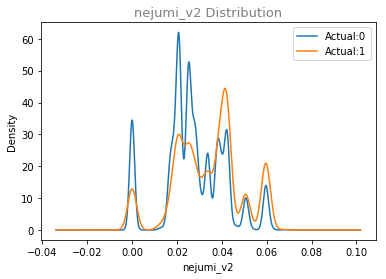

In [48]:
feature_vs_y( X_train['nejumi_v2'], y )

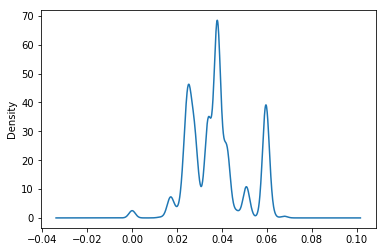

In [49]:
X_test['nejumi_v2'].plot(kind='kde'); plt.show()

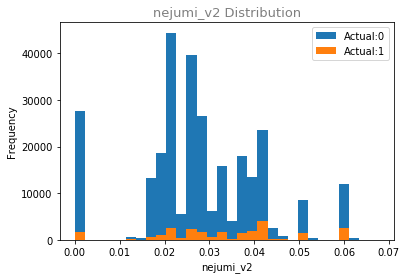

In [52]:
feature_vs_y( X_train['nejumi_v2'], y , kind='hist', bins=30)

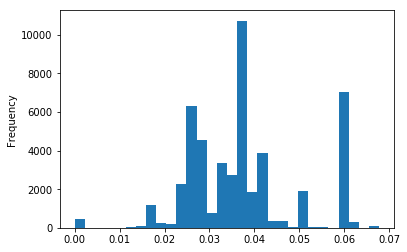

In [53]:
X_test['nejumi_v2'].plot(kind='hist', bins=30); plt.show()